In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
customers = pd.read_csv("E:/Project of DS/Zeotap/Customers.csv")
products = pd.read_csv("E:/Project of DS/Zeotap/Products.csv")
transactions = pd.read_csv("E:/Project of DS/Zeotap/Transactions.csv")

In [6]:
# Merge transactions with customer data
transactions = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

In [8]:
# 1. Feature Engineering: Create aggregated customer data
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending per customer
    'ProductID': 'nunique',  # Number of unique products purchased
    'Quantity': 'sum',  # Total quantity purchased
    'TransactionID': 'count',  # Number of transactions
}).reset_index()

In [10]:
# Add region as categorical data and one-hot encode it
region_dummies = pd.get_dummies(customers['Region'])
region_dummies['CustomerID'] = customers['CustomerID']
customer_features = customer_features.merge(region_dummies, on='CustomerID', how='left')

In [12]:
# 2. Feature Scaling: Standardize the features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

In [14]:
# 3. Clustering: Perform K-Means clustering with a selected number of clusters (e.g., 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [16]:
# 4. Evaluation: Calculate the Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.8713621842965183


In [18]:
# 5. Visualize the clusters: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_features_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = customer_features['Cluster']

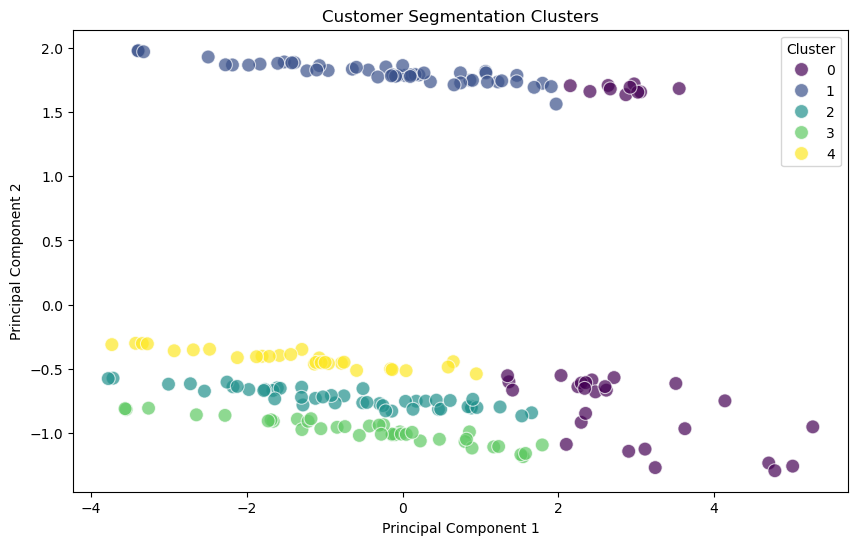

In [20]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=principal_df, palette="viridis", s=100, alpha=0.7)
plt.title("Customer Segmentation Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc='upper right')
plt.show()

In [26]:
# 6. Output: Save the clustering results
customer_features[['CustomerID', 'Cluster']].to_csv("Vijaysing_Dobhal_Clustering.csv", index=False)

In [28]:
# Display the first few customers with their cluster labels
print(customer_features[['CustomerID', 'Cluster']].head())

  CustomerID  Cluster
0      C0001        1
1      C0002        4
2      C0003        1
3      C0004        0
4      C0005        4
